In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

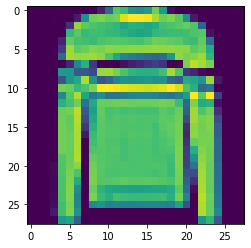

In [7]:
plt.imshow(X_train[5])

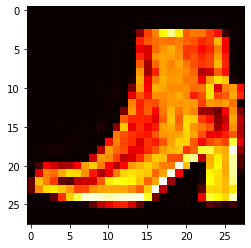

In [11]:
plt.imshow(X_train[2555],cmap='hot')

In [0]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train,10)

In [35]:
y_train[0]

9

In [36]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,10)

In [39]:
y_cat_test.shape

(10000, 10)

In [19]:
y_test.shape

(10000,)

In [0]:
y_cat_train = to_categorical(y_train)

In [21]:
X_train[1].max()

255

In [22]:
X_train[1].min()

0

In [0]:
X_train=X_train/255
X_test = X_test/255

In [25]:
X_train[0].min()

0.0

In [26]:
X_train[0].max()



1.0

In [27]:
X_train.shape

(60000, 28, 28)

In [0]:
X_train = X_train.reshape(60000,28,28,1)

In [0]:
X_test = X_test.reshape(10000,28,28,1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [0]:
model = Sequential()

model.add(Conv2D(32,activation='relu',input_shape=(28,28,1),kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,activation='relu',input_shape=(28,28,1),kernel_size=(4,4)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer = 'adam',
              metrics=['accuracy'])





In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)              

In [67]:
model.fit(X_train,y_cat_train,epochs=30,
          validation_data=(X_test,y_cat_test),
          callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5783 - accuracy: 0.7851 - val_loss: 0.3963 - val_accuracy: 0.8540
Epoch 2/30
1875/1875 [==============================] - 57s 31ms/step - loss: 0.3803 - accuracy: 0.8619 - val_loss: 0.3391 - val_accuracy: 0.8754
Epoch 3/30
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3382 - accuracy: 0.8745 - val_loss: 0.3317 - val_accuracy: 0.8808
Epoch 4/30
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3092 - accuracy: 0.8865 - val_loss: 0.3094 - val_accuracy: 0.8895
Epoch 5/30
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2912 - accuracy: 0.8924 - val_loss: 0.3021 - val_accuracy: 0.8880
Epoch 6/30
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2780 - accuracy: 0.8952 - val_loss: 0.2861 - val_accuracy: 0.8954
Epoch 7/30
1875/1875 [==============================] - 59s 32ms/step - loss: 0.2687 - accuracy: 0.8992 - val_loss: 0.2874 -

In [0]:
metric= pd.DataFrame(model.history.history)

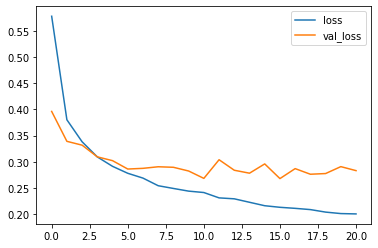

In [69]:
metric[['loss','val_loss']].plot()

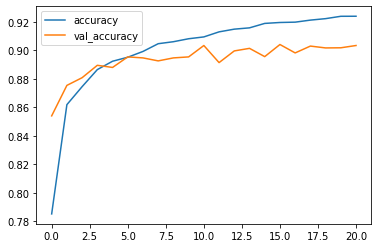

In [70]:
metric[['accuracy','val_accuracy']].plot()

In [61]:
model.fit(X_train,y_cat_train,epochs=30,
          validation_data=(X_test,y_cat_test)
          )

Epoch 1/30
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2021 - accuracy: 0.9233 - val_loss: 0.2840 - val_accuracy: 0.9026
Epoch 2/30
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1990 - accuracy: 0.9240 - val_loss: 0.2803 - val_accuracy: 0.9046
Epoch 3/30
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1961 - accuracy: 0.9257 - val_loss: 0.2868 - val_accuracy: 0.9046
Epoch 4/30
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1934 - accuracy: 0.9280 - val_loss: 0.2765 - val_accuracy: 0.9083
Epoch 5/30
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1925 - accuracy: 0.9263 - val_loss: 0.2823 - val_accuracy: 0.9045
Epoch 6/30
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1913 - accuracy: 0.9272 - val_loss: 0.2765 - val_accuracy: 0.9106
Epoch 7/30
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1843 - accuracy: 0.9308 - val_loss: 0.3048 -

In [0]:
loss= pd.DataFrame(model.history.history)

In [63]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.202128,0.923317,0.284003,0.9026
1,0.198994,0.923950,0.280275,0.9046
2,0.196138,0.925733,0.286769,0.9046
3,0.193450,0.927950,0.276526,0.9083
4,0.192467,0.926283,0.282278,0.9045
5,0.191327,0.927183,0.276507,0.9106
6,0.184324,0.930800,0.304833,0.9035
7,0.185343,0.930117,0.289702,0.9104
8,0.183448,0.929967,0.282131,0.9046
9,0.180017,0.931650,0.282440,0.9090


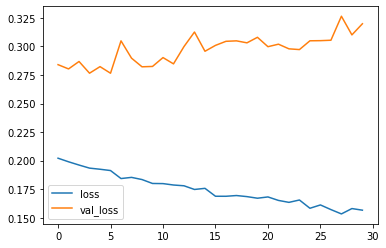

In [64]:
loss[['loss','val_loss']].plot()

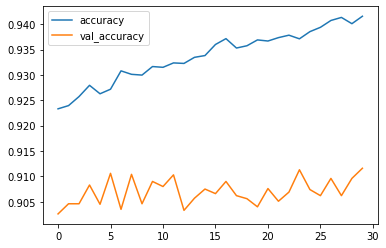

In [65]:
loss[['accuracy','val_accuracy']].plot()

In [0]:
from sklearn.metrics import classification_report

In [72]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.88      0.83      0.85      1000
           3       0.91      0.91      0.91      1000
           4       0.82      0.85      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.68      0.78      0.72      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

